In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### generaremos el dataset a partir del metodo make_blobs
x , y = make_blobs(n_samples=500, random_state=0)

In [6]:
df = pd.DataFrame(x)

In [7]:
df.describe()

,0,1
count,500.000000,500.000000
mean,0.431738,2.679944
std,1.732716,1.799166
min,-4.109701,-2.148479
25%,-1.003387,1.253754
50%,0.574957,2.793273
75%,1.752792,4.072161
max,4.751492,6.560511


In [10]:
k_means_model = KMeans(n_init=10)

In [11]:
k_means_model.fit(df)

KMeans(n_init=10)

In [12]:
### un modelo no supervisado se basa en la agrupacion de elementos, para esto genera un conjunto de etiquetas
k_means_model.labels_

array([3, 6, 2, 5, 6, 3, 5, 6, 2, 5, 6, 6, 2, 5, 5, 5, 7, 3, 2, 3, 1, 4,
       1, 6, 5, 2, 4, 5, 5, 6, 2, 3, 0, 6, 4, 4, 1, 1, 4, 4, 2, 3, 3, 1,
       1, 0, 4, 3, 2, 2, 5, 3, 0, 0, 6, 2, 7, 4, 3, 4, 1, 5, 4, 7, 1, 2,
       4, 7, 5, 0, 2, 0, 0, 6, 1, 6, 1, 7, 4, 3, 3, 0, 2, 5, 2, 7, 2, 2,
       5, 2, 5, 3, 1, 0, 5, 1, 2, 5, 5, 5, 1, 2, 2, 3, 0, 4, 3, 1, 3, 4,
       0, 0, 4, 5, 2, 7, 6, 1, 4, 2, 2, 1, 5, 6, 2, 3, 2, 3, 5, 0, 1, 3,
       6, 4, 5, 1, 2, 6, 5, 5, 3, 0, 2, 7, 5, 0, 5, 7, 1, 0, 1, 5, 0, 3,
       1, 0, 5, 4, 5, 5, 1, 5, 2, 2, 2, 1, 5, 1, 0, 1, 6, 6, 1, 3, 3, 6,
       6, 4, 4, 7, 1, 4, 2, 2, 4, 1, 3, 1, 5, 6, 2, 5, 4, 1, 3, 6, 7, 5,
       2, 7, 6, 1, 5, 0, 2, 4, 4, 4, 2, 2, 3, 4, 4, 2, 5, 3, 2, 3, 2, 2,
       1, 6, 1, 7, 3, 3, 0, 1, 2, 0, 5, 2, 5, 7, 6, 2, 5, 7, 3, 3, 0, 1,
       4, 7, 3, 6, 2, 6, 2, 2, 7, 6, 5, 5, 6, 2, 0, 7, 6, 4, 1, 5, 5, 1,
       4, 5, 5, 1, 2, 1, 1, 2, 1, 3, 5, 1, 3, 1, 4, 4, 4, 2, 1, 5, 3, 0,
       0, 2, 2, 4, 7, 2, 2, 0, 5, 1, 2, 3, 2, 1, 3,

In [13]:
### ahora explicaremos de forma grafica que significa estos labels, como interpreta esto el modelo de k_means
### conoscamos a los centroides
k_means_model.cluster_centers_

array([[ 0.13523046,  5.21890254],
       [ 2.71820498,  1.3961326 ],
       [-1.89152589,  2.36061786],
       [ 1.72426871,  4.58018405],
       [ 0.89598304,  0.82938548],
       [ 0.32770568,  3.16651447],
       [-1.65464678,  4.06234744],
       [ 1.90781302, -0.53937639]])

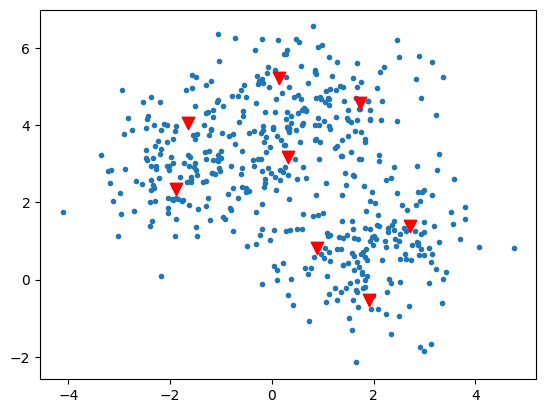

In [17]:
plt.scatter(df.to_numpy()[:,0],df.to_numpy()[:,1], marker='.')
plt.scatter(k_means_model.cluster_centers_[:,0],k_means_model.cluster_centers_[:,1], marker='v',c='red',s=80)
plt.show()

In [22]:
### la tecnica del Elbow (codo)
centers = range(1,14)

In [23]:
clusters = [KMeans(n_clusters=center, n_init=10) for center in centers]

In [24]:
scores = [clusters[index].fit(df).score(df) for index in range(len(clusters))]

In [25]:
scores

[-3113.4118874780634,
 -1534.489355958699,
 -881.7895709143346,
 -741.5065888001716,
 -620.6355778442298,
 -508.24830115305247,
 -445.93079255342195,
 -395.9279434909199,
 -352.5880498376029,
 -318.4128277085882,
 -287.5846547968145,
 -266.63474283536044,
 -249.5996426722707]

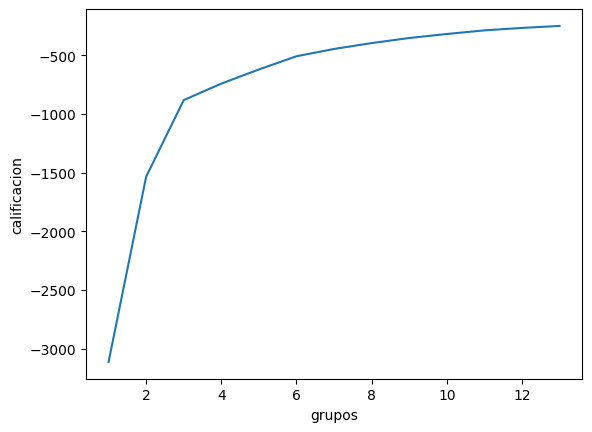

In [27]:
### procedemos a graficar la curva del codo
plt.plot(centers,scores)
plt.xlabel("grupos")
plt.ylabel("calificacion")
plt.show()

In [28]:
k_means_model_upg = KMeans(n_clusters=3, n_init=10)

In [29]:
k_means_model_upg.fit(df)

KMeans(n_clusters=3, n_init=10)

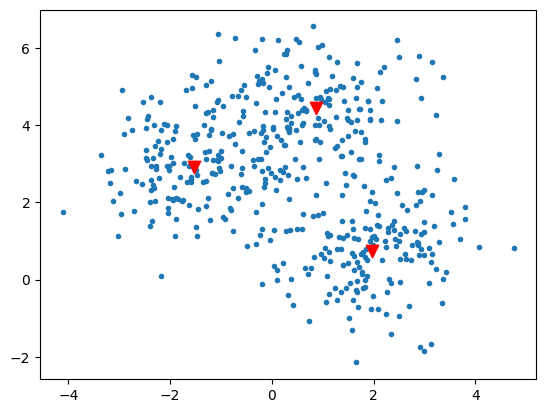

In [30]:
plt.scatter(df.to_numpy()[:,0],df.to_numpy()[:,1], marker='.')
plt.scatter(k_means_model_upg.cluster_centers_[:,0],k_means_model_upg.cluster_centers_[:,1], marker='v',c='red',s=80)
plt.show()